## Full Fisher

Fisher matrix prediction for a full set of cosmological parameters  $\left\lbrace  h, \Omega_{m,0}, \Omega_{b,0}, \sigma_{8}, b, n_s, w_0, w_a\right\rbrace$ Here the photometric error is considered constant but provided externally by the user.

In [77]:
# Importing stuff

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
import pylab as pl
from scipy import interpolate 
from code.plot_utils import plot_pretty
from scipy.interpolate import RectBivariateSpline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [78]:
# First the functions that calculate the derivatives with respect to the considered cosmological parameters 

# Returns cosmological parameters for variable h 

def hubble_var(k, z, h_var):
    """
    Returns for a variable value of the hubble factor h the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    # define cosmology with variable h
    
    params_h_var = {'flat': True, 'H0': 100.0*h_var, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 
          'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo_h_var = cosmology.setCosmology('planck_w0wa', params_h_var)
    
    D_h_var = cosmo_h_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_h_var = cosmo_h_var.growthFactor(z, derivative=1, inverse=False)
    f_h_var = -(1.0+z)*dDdz_h_var/D_h_var
    P_h_var = cosmo_h_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_h_var, f_h_var, P_h_var 

#===============================================================================

# Returns cosmological parameters for variable omega matter 

def matter_var(k, z,  omeg_var):
    """
    Returns for a variable value of the matter density the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    
    # define cosmology with variable omega_mu 
    
    params_mat_var = {'flat': True, 'H0': 67.2, 'Om0': omeg_var, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95,
                      'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo_mat_var = cosmology.setCosmology('myCosmo',params_mat_var)
    
    D_mat_var = cosmo_mat_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_mat_var = cosmo_mat_var.growthFactor(z, derivative=1, inverse=False)
    f_mat_var = -(1.0+z)*dDdz_mat_var/D_mat_var
    P_mat_var = cosmo_mat_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_mat_var, f_mat_var, P_mat_var 

#=======================================================================================================

# Returns cosmological parameters for variable omega baryon 

def baryon_var(k, z,  bar_var):
    """
    Returns for a variable value of the baryon density the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    
    # define cosmology with variable omega_mu 
    
    params_bar_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': bar_var, 'sigma8': 0.81, 'ns': 0.95,
                      'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo_bar_var = cosmology.setCosmology('myCosmo',params_bar_var)
    
    D_bar_var = cosmo_bar_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_bar_var = cosmo_bar_var.growthFactor(z, derivative=1, inverse=False)
    f_bar_var = -(1.0+z)*dDdz_bar_var/D_bar_var
    P_bar_var = cosmo_bar_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_bar_var, f_bar_var, P_bar_var 

#=========================================================================================================

# Returns cosmological parameters for variable sigma_8
def sigma_8_var(k, z, sigma_var):
    """
    RReturns for a variable value of sigma_8  the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    # define cosmoloft with variable sigma_8
    
    params_sig_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': sigma_var, 'ns': 0.95,
                      'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo_sig_var = cosmology.setCosmology('myCosmo',params_sig_var)
    #-----------------------------------------------------------------------------
    
    D_sig_var = cosmo_sig_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_sig_var = cosmo_sig_var.growthFactor(z, derivative=1, inverse=False)
    f_sig_var = -(1.0+z)*dDdz_sig_var/D_sig_var
    P_sig_var = cosmo_sig_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_sig_var, f_sig_var, P_sig_var

#===========================================================================================

# Returns cosmological parameters for variable ns

def tilt_var(k, z, ns_var):
    """
    RReturns for a variable value of ns  the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    # define cosmoloft with variable sigma_8
    
    params_ns_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': ns_var,
                      'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo_ns_var = cosmology.setCosmology('myCosmo',params_ns_var)
    #-----------------------------------------------------------------------------
    
    D_ns_var = cosmo_ns_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_ns_var = cosmo_ns_var.growthFactor(z, derivative=1, inverse=False)
    f_ns_var = -(1.0+z)*dDdz_ns_var/D_ns_var
    P_ns_var = cosmo_ns_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_ns_var, f_ns_var, P_ns_var

#================================================================================================

#===========================================================================================

# Returns cosmological parameters for variable w0

def w0par_var(k, z, w0_var):
    """
    RReturns for a variable value of w0  the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    # define cosmoloft with variable sigma_8
    
    params_w0_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95,
                      'de_model':'w0wa' , 'w0': w0_var, 'wa':0.0 }
    cosmo_w0_var = cosmology.setCosmology('myCosmo',params_w0_var)
    #-----------------------------------------------------------------------------
    
    D_w0_var = cosmo_w0_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_w0_var = cosmo_w0_var.growthFactor(z, derivative=1, inverse=False)
    f_w0_var = -(1.0+z)*dDdz_w0_var/D_w0_var
    P_w0_var = cosmo_w0_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_w0_var, f_w0_var, P_w0_var

#================================================================================================

#===========================================================================================

# Returns cosmological parameters for variable w_a

def wapar_var(k, z, wa_var):
    """
    RReturns for a variable value of w0  the growth factor D(z), the growth rate f(z) and the  
    matter power spectrum P_m(k)
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    D(z), f(z), P_m(k)
    """
    
    # define cosmoloft with variable sigma_8
    
    params_wa_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95,
                      'de_model':'w0wa' , 'w0': -1.0, 'wa': wa_var }
    cosmo_wa_var = cosmology.setCosmology('myCosmo',params_wa_var)
    #-----------------------------------------------------------------------------
    
    D_wa_var = cosmo_wa_var.growthFactor(z, derivative=0, inverse=False)
    dDdz_wa_var = cosmo_wa_var.growthFactor(z, derivative=1, inverse=False)
    f_wa_var = -(1.0+z)*dDdz_wa_var/D_wa_var
    P_wa_var = cosmo_wa_var.matterPowerSpectrum(k, model='eisenstein98', derivative=False)
    
    
    return D_wa_var, f_wa_var, P_wa_var

#=============================================================================================================
#=============================================================================================================
#===============================================================
# Functions that calculate the derivatives with respect to cosmological parameters
#===============================================================
#=============================================================================================================
#=============================================================================================================


#Derivatives with respect to hubble parameter h 

def hubble_derivs(k,z, hubble):
    """
    Function that calculates all the derivatives with respect to hubble parameter h 

    returns: dDdh, dfdh dPmdh
    
    """
    h_hub = hubble/100.0
    #step
    h = h_hub/100.0
    
    D_1, f_1, P_1 = hubble_var(k,z, h_hub + 2.0*h)
    D_2, f_2, P_2 = hubble_var(k, z, h_hub + h)
    D_3, f_3, P_3 = hubble_var(k, z, h_hub - h)
    D_4, f_4, P_4 = hubble_var(k,z, h_hub - 2.0*h)
    
    #Calculation of derivatives
    
    dD_hub = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_hub = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_hub = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_hub, df_hub, dP_hub 

#Derivatives with respect to matter density 

def matter_derivs(k,z, omega_mu):
    """
    Function that calculates all the derivatives with respect to matter density 

    returns: dDdOm, dfdOm dPmdOm
    
    """
    #step
    h = omega_mu/100.0
    
    D_1, f_1, P_1 = matter_var(k,z, omega_mu + 2.0*h)
    D_2, f_2, P_2 = matter_var(k, z, omega_mu + h)
    D_3, f_3, P_3 = matter_var(k, z, omega_mu - h)
    D_4, f_4, P_4 = matter_var(k,z, omega_mu - 2.0*h)
    
    #Calculation of derivatives
    
    dD_mat = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_mat = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_mat = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_mat, df_mat, dP_mat 


#=========================================================================================
#Derivatives with respect to baryon density 

def baryon_derivs(k,z, omega_b):
    """
    Function that calculates all the derivatives with respect to baryon density 

    returns: dDdOb, dfdOb dPmdOb
    
    """

    
    #step
    h = omega_b/100.0
    
    D_1, f_1, P_1 = baryon_var(k,z, omega_b + 2.0*h)
    D_2, f_2, P_2 = baryon_var(k, z, omega_b + h)
    D_3, f_3, P_3 = baryon_var(k, z, omega_b - h)
    D_4, f_4, P_4 = baryon_var(k,z, omega_b - 2.0*h)
    
    #Calculation of derivatives
    
    dD_b = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_b = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_b = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_b, df_b, dP_b 

#================================================================================
# Derivatives with respect to sigma_8
    
def sigma_derivs(k,z, sigma_8):
    """
    Function that calculates all the derivatives with respect to matter density 

    returns: dDdsig8, dfdsig8, dPmdsig8
    
    """
    #step
    h = sigma_8/100.0
    
    D_1, f_1, P_1 = sigma_8_var(k,z, sigma_8 + 2.0*h)
    D_2, f_2, P_2 = sigma_8_var(k, z, sigma_8 + h)
    D_3, f_3, P_3 = sigma_8_var(k, z, sigma_8 - h)
    D_4, f_4, P_4 = sigma_8_var(k,z, sigma_8 - 2.0*h)
    
    #Calculation of derivatives
    
    dD_sig = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_sig = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_sig = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_sig, df_sig, dP_sig 

#====================================================================================
# Derivatives with respect to power spectrum tilt


def tilt_derivs(k,z, ns):
    """
    Function that calculates all the derivatives with respect to the power spectrum tilt  

    returns: dDdns, dfdns, dPmdns
    
    """
    #step
    h = ns/100.0
    
    D_1, f_1, P_1 = tilt_var(k,z, ns + 2.0*h)
    D_2, f_2, P_2 = tilt_var(k, z, ns + h)
    D_3, f_3, P_3 = tilt_var(k, z, ns - h)
    D_4, f_4, P_4 = tilt_var(k,z, ns - 2.0*h)

    #Calculation of derivatives
    
    dD_tilt = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_tilt = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_tilt = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_tilt, df_tilt, dP_tilt 

#======================================================================================


# Derivatives with respect to w_0


def w0par_derivs(k,z, w_0):
    """
    Function that calculates all the derivatives with respect to w_0 

    returns: dDdw0, dfdw0, dPmdw0
    
    """
    #step
    h = 1.0/100.0
    
    D_1, f_1, P_1 = w0par_var(k,z, w_0 + 2.0*h)
    D_2, f_2, P_2 = w0par_var(k, z, w_0 + h)
    D_3, f_3, P_3 = w0par_var(k, z, w_0 - h)
    D_4, f_4, P_4 = w0par_var(k,z, w_0 - 2.0*h)

    #Calculation of derivatives
    
    dD_w0par = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_w0par = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_w0par = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_w0par, df_w0par, dP_w0par 

#======================================================================================

# Derivatives with respect to w_a


def wapar_derivs(k,z, w_a):
    """
    Function that calculates all the derivatives with respect to w_a 

    returns: dDdwa, dfdwa, dPmdwa
    
    """
    #step
    h = 1.0/100.0
    
    D_1, f_1, P_1 = wapar_var(k,z, w_a + 2.0*h)
    D_2, f_2, P_2 = wapar_var(k, z, w_a + h)
    D_3, f_3, P_3 = wapar_var(k, z, w_a - h)
    D_4, f_4, P_4 = wapar_var(k,z, w_a - 2.0*h)

    #Calculation of derivatives
    
    dD_wapar = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    df_wapar = (- f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    dP_wapar = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    
    return dD_wapar, df_wapar, dP_wapar 




In [79]:
# Define here the main function that calculates the Fisher Matrix

def Fish_Estimate(z_min, z_max, k_min, k_max, f_sky, n_dens, b, sigma_z, **fidpars):
    
    """
    This function calculates the Fisher Matrix 
    ------------------------------------------
    ------------------------------------------
    
    Parameters:
    ------------------------------------------
    z_min: float, minimum redshift of the bin
    
    z_max: float, maximum redshift of the bin
    
    k_min: float, minimum k  in the calculation of the Fisher Matrix in h/Mpc 
    
    k_max: float, maximum k in the calculation of the Fisher Matrix in h/Mpc
    
    f_sky: float, fraction of the sky that the survey covers. e.g. 0.12 for DES
    
    n_dens: float, the number density of galaxies inside the redshift bin in h^3/Mpc^3 
    
    b: the fiducial of the bias
    
    sigma_z: the present day value of the redshift error
    
    Returns:
    ------------------------------------------
    
    Fisher_matr: 2 dimensional array of floats containing the elements of the Fisher Matrix
    
    """
    #==================================================
    # Set constants and parameters that we will need
    
    
    # speed of light in km/s 
    
    c = 2.99792e+5
    
    
    
    #prefactor of all integrals  - 1/4pi^2
    
    pref = 1.0/(4.0*np.pi**2.0)
    
    #mean redshift - all calculation will be done with this fiducial redshift
    
    z = (z_min + z_max)/2.0
    
    #fiducial parameters --- in a later version, the user will be able to give them externally
    hubble = 67.2
    omega_mu = 0.31
    sigma_8 = 0.81
    omega_b = 0.049
    ns = 0.95
    w_0 = -1.0
    w_a = 0.0
    
    
    # k and mu
    
    k_lin_min = np.log10(k_min)
    k_lin_max = np.log10(k_max)
    
    k_lin = np.linspace(k_lin_min, k_lin_max, 1000)        #  k evenly spaced in logk
    k_val = np.power(10, k_lin)
    
    mu_val = np.linspace(0.0,1.0,1000)                     # Spacing in mu        
    
    kk,mm = np.meshgrid(k_val, mu_val)                       # Grid in order to calculate the cosm. functions for every m,k
    
    
    #========================================================
    #========================================================
    # Define fiducial cosmology - set up colossus
    params = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 
          'de_model':'w0wa' , 'w0': -1.0, 'wa':0.0 }
    cosmo = cosmology.setCosmology('mycosmo', params)
    
#=======================================================
    #Calculation of volume - using formula (5)
    
    dmax = cosmo.comovingDistance(0.0, z_max)
    dmin = cosmo.comovingDistance(0.0, z_min)
    vol = (4.0*np.pi/3.0)*f_sky*(dmax**3.0 - dmin**3.0)
    
    #=====================================================
    
    #Calculate things we will need
    
    # Hubble parameter
    H_z = cosmo.Hz(z)
    # Growth factor calculation 
    D_z = cosmo.growthFactor(z, derivative=0, inverse=False)
    # dD/dz calculation
    dDdz = cosmo.growthFactor(z, derivative=1, inverse=False)
    # Growth rate calculation
    f_z = -(1.0 + z)*dDdz/D_z
  
    # Calculation of the exponential factor, matter power spectrum, prefactor for the power spectrum - see eq. (7)
    
    exp_fact = np.exp(- (kk*mm*c*sigma_z*(1.0 + z)/H_z)**2.0)     #Exponential factor
    prefact = (D_z**2.0)*((b + f_z*(mm**2.0))**2.0)               #Prefacor - RSD's
    P_k_m = cosmo.matterPowerSpectrum(kk, model='eisenstein98', derivative=False)
    
    #====================================================================
    #Now the galaxy power spectrum
    
    P_gal = prefact*P_k_m*exp_fact
    
    #Calculation of the effective volume 
    
    V_eff = vol*((n_dens*P_gal/(n_dens*P_gal + 1.0))**2.0)
   
    #=========================================================================
    #=========================================================================
    # CALCULATION OF DERIVATIVES - IN THIS PART THE DERIVATIVES ARE CALCULATED
    #=========================================================================
    #=========================================================================
    # First calculation of "intermediate" derivatives 
    # We will need them in order to calculate the derivatives 

    
    # Calculation of the derivative of D, f, P_m(k) with respect to the cosmological parameters 
    dDdh, dfdh, dPmdh  =  hubble_derivs(kk,z, hubble)
    dDdOm, dfdOm, dPmdOm  =  matter_derivs(kk,z, omega_mu)
    dDdOb, dfdOb, dPmdOb  =  baryon_derivs(kk,z, omega_b)
    dDdsig8, dfdsig8, dPmdsig8 = sigma_derivs(kk,z, sigma_8)
    dDdns, dfdns, dPmdns  =  tilt_derivs(kk,z, ns)
    dDdw0, dfdw0, dPmdw0  =  w0par_derivs(kk,z, w_0)
    dDdwa, dfdwa, dPmdwa  =  wapar_derivs(kk,z, w_a)
    #-------------------------------------------------------------------------
    # Actual calculation of derivatives 
    #-------------------------------------------------------------------------
    # Derivative with respect to bias
    
    dlnPdbias = 2.0/(b + f_z*(mm**2.0))
    
    
    # Derivative with respect to hubble factor h
    
    part_1 = 2.0*(mm**2.0)*dfdh/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdh/D_z
    part_3 = dPmdh/P_k_m
    
    dlnPdh =  part_1 + part_2 + part_3
    
    # Derivative with respect to matter density
    
    part_1 = 2.0*(mm**2.0)*dfdOm/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdOm/D_z
    part_3 = dPmdOm/P_k_m
    
    dlnPdOm =  part_1 + part_2 + part_3
    
    # Derivative with respect to baryon density
    
    part_1 = 2.0*(mm**2.0)*dfdOb/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdOb/D_z
    part_3 = dPmdOb/P_k_m
    
    dlnPdOb =  part_1 + part_2 + part_3
    
    # Derivative with respect to sigma_8
    
    part_1 = 2.0*(mm**2.0)*dfdsig8/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdsig8/D_z
    part_3 = dPmdsig8/P_k_m
    
    dlnPdsig8 =  part_1 + part_2 + part_3
    
    # Derivative with respect to tilt ns
    
    part_1 = 2.0*(mm**2.0)*dfdns/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdns/D_z
    part_3 = dPmdns/P_k_m
    
    dlnPdns =  part_1 + part_2 + part_3
    
    # Derivative with respect to w_0
    
    part_1 = 2.0*(mm**2.0)*dfdw0/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdw0/D_z
    part_3 = dPmdw0/P_k_m
    
    dlnPdw0 =  part_1 + part_2 + part_3
    
    # Derivative with respect to w_a
    
    part_1 = 2.0*(mm**2.0)*dfdwa/(b + f_z*(mm**2.0))
    part_2 = 2.0*dDdwa/D_z
    part_3 = dPmdwa/P_k_m
    
    dlnPdwa =  part_1 + part_2 + part_3
    
    
    #=====================================================================================
    #=====================================================================================
    # FISHER MATRIX ELEMENTS CALCULATION
    #=====================================================================================
    #=====================================================================================
    # This is the Fisher Matrix
    Fish = np.zeros([8,8])
    
    #0 = h,  1 = Omega_m, 2 = Omega_b , 3 = sigma_8, 4  = bias, 5 =ns , 6 = w_0, 7= w_a
    
    # The common factor that all integrals have 
    
    com_fact = np.log(10.0)*pref*(kk**3.0)*V_eff
    
    #========================================================
    # First diagonal terms
    #========================================================
    
    integrand_00 = com_fact*(dlnPdh**2.0)
    int_spl_00 = RectBivariateSpline(k_lin, mu_val, integrand_00)
    
    F_00 = int_spl_00.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,0] = F_00
    
    #-------------------------------------------------------
    
    integrand_11 = com_fact*(dlnPdOm**2.0)
    int_spl_11 = RectBivariateSpline(k_lin, mu_val, integrand_11)
    
    F_11 = int_spl_11.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,1]=F_11
    
    #--------------------------------------------------------
    
    integrand_22 = com_fact*(dlnPdOb**2.0)
    int_spl_22 = RectBivariateSpline(k_lin, mu_val, integrand_22)
    
    F_22 =  int_spl_22.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,2]=F_22
    
    #--------------------------------------------------------
    
    integrand_33 = com_fact*(dlnPdsig8**2.0)
    int_spl_33 = RectBivariateSpline(k_lin, mu_val, integrand_33)
    
    F_33 =  int_spl_33.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[3,3]=F_33
    
    #--------------------------------------------------------
    
    integrand_44 = com_fact*(dlnPdbias**2.0)
    int_spl_44 = RectBivariateSpline(k_lin, mu_val, integrand_44)
    
    F_44 =  int_spl_44.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[4,4]=F_44
     
    #--------------------------------------------------------
    
    integrand_55 = com_fact*(dlnPdns**2.0)
    int_spl_55 = RectBivariateSpline(k_lin, mu_val, integrand_55)
    
    F_55 =  int_spl_55.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[5,5]=F_55
    
    #--------------------------------------------------------
    
    integrand_66 = com_fact*(dlnPdw0**2.0)
    int_spl_66 = RectBivariateSpline(k_lin, mu_val, integrand_66)
    
    F_66 =  int_spl_66.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[6,6]=F_66
    
    #--------------------------------------------------------
    
    integrand_77 = com_fact*(dlnPdwa**2.0)
    int_spl_77 = RectBivariateSpline(k_lin, mu_val, integrand_77)
    
    F_77 =  int_spl_77.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[7,7]=F_77
    
    #=======================================================
    # Then off diagonal terms
    #=======================================================
    
    # First digit 0
    
    integrand_01 = com_fact*(dlnPdh*dlnPdOm)
    int_spl_01 = RectBivariateSpline(k_lin, mu_val, integrand_01)
    
    F_01 =  int_spl_01.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,1]=F_01
    Fish[1,0]=F_01
    
    #-------------
    
    integrand_02 = com_fact*(dlnPdh*dlnPdOb)
    int_spl_02 = RectBivariateSpline(k_lin, mu_val, integrand_02)
    
    F_02 =  int_spl_02.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,2]=F_02
    Fish[2,0]=F_02
    #--------------------
    integrand_03 = com_fact*(dlnPdh*dlnPdsig8)
    int_spl_03 = RectBivariateSpline(k_lin, mu_val, integrand_03)
    
    F_03 =  int_spl_03.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,3]=F_03
    Fish[3,0]=F_03
    
    #--------------------
    integrand_04 = com_fact*(dlnPdh*dlnPdbias)
    int_spl_04 = RectBivariateSpline(k_lin, mu_val, integrand_04)
    
    F_04 =  int_spl_04.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,4]=F_04
    Fish[4,0]=F_04
    
    #--------------------
    integrand_05 = com_fact*(dlnPdh*dlnPdns)
    int_spl_05 = RectBivariateSpline(k_lin, mu_val, integrand_05)
    
    F_05 =  int_spl_05.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,5]=F_05
    Fish[5,0]=F_05
    
    #--------------------
    integrand_06 = com_fact*(dlnPdh*dlnPdw0)
    int_spl_06 = RectBivariateSpline(k_lin, mu_val, integrand_06)
    
    F_06 =  int_spl_06.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,6]=F_06
    Fish[6,0]=F_06
    
    #--------------------
    integrand_07 = com_fact*(dlnPdh*dlnPdwa)
    int_spl_07 = RectBivariateSpline(k_lin, mu_val, integrand_07)
    
    F_07 =  int_spl_07.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[0,7]=F_07
    Fish[7,0]=F_07
    
    # First digit 1
    
    integrand_12 = com_fact*(dlnPdOm*dlnPdOb)
    int_spl_12 = RectBivariateSpline(k_lin, mu_val, integrand_12)
    
    F_12 =  int_spl_12.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,2]=F_12
    Fish[2,1]=F_12
    
    #-------------------------
    
    integrand_13 = com_fact*(dlnPdOm*dlnPdsig8)
    int_spl_13 = RectBivariateSpline(k_lin, mu_val, integrand_13)
    
    F_13 =  int_spl_13.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,3]=F_13
    Fish[3,1]=F_13
    
    #-------------------------
    
    integrand_14 = com_fact*(dlnPdOm*dlnPdbias)
    int_spl_14 = RectBivariateSpline(k_lin, mu_val, integrand_14)
    
    F_14 =  int_spl_14.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,4]=F_14
    Fish[4,1]=F_14
    
    #-------------------------
    
    integrand_15 = com_fact*(dlnPdOm*dlnPdns)
    int_spl_15 = RectBivariateSpline(k_lin, mu_val, integrand_15)
    
    F_15 =  int_spl_15.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,5]=F_15
    Fish[5,1]=F_15
    
    #-------------------------
    
    integrand_16 = com_fact*(dlnPdOm*dlnPdw0)
    int_spl_16 = RectBivariateSpline(k_lin, mu_val, integrand_16)
    
    F_16 =  int_spl_16.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,6]=F_16
    Fish[6,1]=F_16
    
    #-------------------------
    
    integrand_17 = com_fact*(dlnPdOm*dlnPdwa)
    int_spl_17 = RectBivariateSpline(k_lin, mu_val, integrand_17)
    
    F_17 =  int_spl_17.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[1,7]=F_17
    Fish[7,1]=F_17
    
    #Second digit 2
    
    integrand_23 = com_fact*(dlnPdOb*dlnPdsig8)
    int_spl_23 = RectBivariateSpline(k_lin, mu_val, integrand_23)
    
    F_23 =  int_spl_23.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,3]=F_23
    Fish[3,2]=F_23
    
    #-------------------------
    
    integrand_24 = com_fact*(dlnPdOb*dlnPdbias)
    int_spl_24 = RectBivariateSpline(k_lin, mu_val, integrand_24)
    
    F_24 =  int_spl_24.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,4]=F_24
    Fish[4,2]=F_24
    
    #-------------------------
    
    integrand_25 = com_fact*(dlnPdOb*dlnPdns)
    int_spl_25 = RectBivariateSpline(k_lin, mu_val, integrand_25)
    
    F_25 =  int_spl_25.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,5]=F_25
    Fish[5,2]=F_25
    
    #-------------------------
    
    integrand_26 = com_fact*(dlnPdOb*dlnPdw0)
    int_spl_26 = RectBivariateSpline(k_lin, mu_val, integrand_26)
    
    F_26 =  int_spl_26.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,6]=F_26
    Fish[6,2]=F_26
    
    #-------------------------
    
    integrand_27 = com_fact*(dlnPdOb*dlnPdwa)
    int_spl_27 = RectBivariateSpline(k_lin, mu_val, integrand_27)
    
    F_27 =  int_spl_27.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[2,7]=F_27
    Fish[7,2]=F_27
    
    # First digit 3
    
    #-------------------------
    
    integrand_34 = com_fact*(dlnPdsig8*dlnPdbias)
    int_spl_34 = RectBivariateSpline(k_lin, mu_val, integrand_34)
    
    F_34 =  int_spl_34.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[3,4]=F_34
    Fish[4,3]=F_34
    
    #-------------------------
    
    integrand_35 = com_fact*(dlnPdsig8*dlnPdns)
    int_spl_35 = RectBivariateSpline(k_lin, mu_val, integrand_35)
    
    F_35 =  int_spl_35.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[3,5]=F_35
    Fish[5,3]=F_35
    
    #-------------------------
    
    integrand_36 = com_fact*(dlnPdsig8*dlnPdw0)
    int_spl_36 = RectBivariateSpline(k_lin, mu_val, integrand_36)
    
    F_36 =  int_spl_36.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[3,6]=F_36
    Fish[6,3]=F_36
    
    #-------------------------
    
    integrand_37 = com_fact*(dlnPdsig8*dlnPdwa)
    int_spl_37 = RectBivariateSpline(k_lin, mu_val, integrand_37)
    
    F_37 =  int_spl_37.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[3,7]=F_37
    Fish[7,3]=F_37
    
    # First digit 4 
    
    #-------------------------
    
    integrand_45 = com_fact*(dlnPdbias*dlnPdns)
    int_spl_45 = RectBivariateSpline(k_lin, mu_val, integrand_45)
    
    F_45 =  int_spl_45.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[4,5]=F_45
    Fish[5,4]=F_45
    
      
    #-------------------------
    
    integrand_46 = com_fact*(dlnPdbias*dlnPdw0)
    int_spl_46 = RectBivariateSpline(k_lin, mu_val, integrand_46)
    
    F_46 =  int_spl_46.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[4,6]=F_46
    Fish[6,4]=F_46
    
    #-------------------------
    
    integrand_47 = com_fact*(dlnPdbias*dlnPdwa)
    int_spl_47 = RectBivariateSpline(k_lin, mu_val, integrand_47)
    
    F_47 =  int_spl_47.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[4,7]=F_47
    Fish[7,4]=F_47
    
    #First digit 5 
    
    integrand_56 = com_fact*(dlnPdns*dlnPdw0)
    int_spl_56 = RectBivariateSpline(k_lin, mu_val, integrand_56)
    
    F_56 =  int_spl_56.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[5,6]=F_56
    Fish[6,5]=F_56
    
    #------------------------
    
    integrand_57 = com_fact*(dlnPdns*dlnPdwa)
    int_spl_57 = RectBivariateSpline(k_lin, mu_val, integrand_57)
    
    F_57 =  int_spl_57.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[5,7]=F_57
    Fish[7,5]=F_57
    
    # First digit 6 
    
    integrand_67 = com_fact*(dlnPdw0*dlnPdwa)
    int_spl_67 = RectBivariateSpline(k_lin, mu_val, integrand_67)
    
    F_67 =  int_spl_67.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    Fish[6,7]=F_67
    Fish[7,6]=F_67
    
    
    return Fish

In [80]:
z_min = 0.6
z_max = 0.9
f_sk = 0.12
k_min = 1.0e-3
k_max = 0.2
bias = 1.0  
dens = 1.5
sig_0 = 0.001

Fisher_matr_1 = Fish_Estimate(z_min, z_max, k_min, k_max, f_sk, dens, bias, sig_0)

### Using CosmicFish to Plot

In [81]:
import numpy as np
import math
import sys
import os
import IPython

#=================================================================================

cosmicfish_pylib_path = '/Users/Dimitris/Desktop/Project_all/Good_codes/CosmicFish/python'
sys.path.insert(0, os.path.normpath(cosmicfish_pylib_path))

#================================================================================
import cosmicfish_pylib.utilities            as fu
import cosmicfish_pylib.colors               as fc
import cosmicfish_pylib.fisher_matrix        as fm
import cosmicfish_pylib.fisher_derived       as fd
import cosmicfish_pylib.fisher_operations    as fo
import cosmicfish_pylib.fisher_plot_settings as fps
import cosmicfish_pylib.fisher_plot_analysis as fpa
import cosmicfish_pylib.fisher_plot          as fp

#================================================================================

fu.CosmicFish_write_header('Plotting our Fisher matrices')


**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ Py Lib
 
**************************************************************
Plotting our Fisher matrices
 This application was developed using the CosmicFish code.
**************************************************************



In [82]:
matrix = Fisher_matr_1
param_names = ['$h$', '$\Omega_{\mbox{m},0}$', '$\Omega_{\mbox{b},0}$', '$\sigma_8$', '$b$', '$n_s$', '$w_0$', '$w_a$']

fiducial = [0.672, 0.31, 0.049, 0.81, bias, 0.95, -1.0, 0.0]

In [83]:
fisher = fm.fisher_matrix( fisher_matrix=matrix, fiducial = fiducial, param_names=param_names )

fisher.name = '3D_analysis - 8 parameters'

fisher_list = fpa.CosmicFish_FisherAnalysis()
fisher_list.add_fisher_matrix([fisher])
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

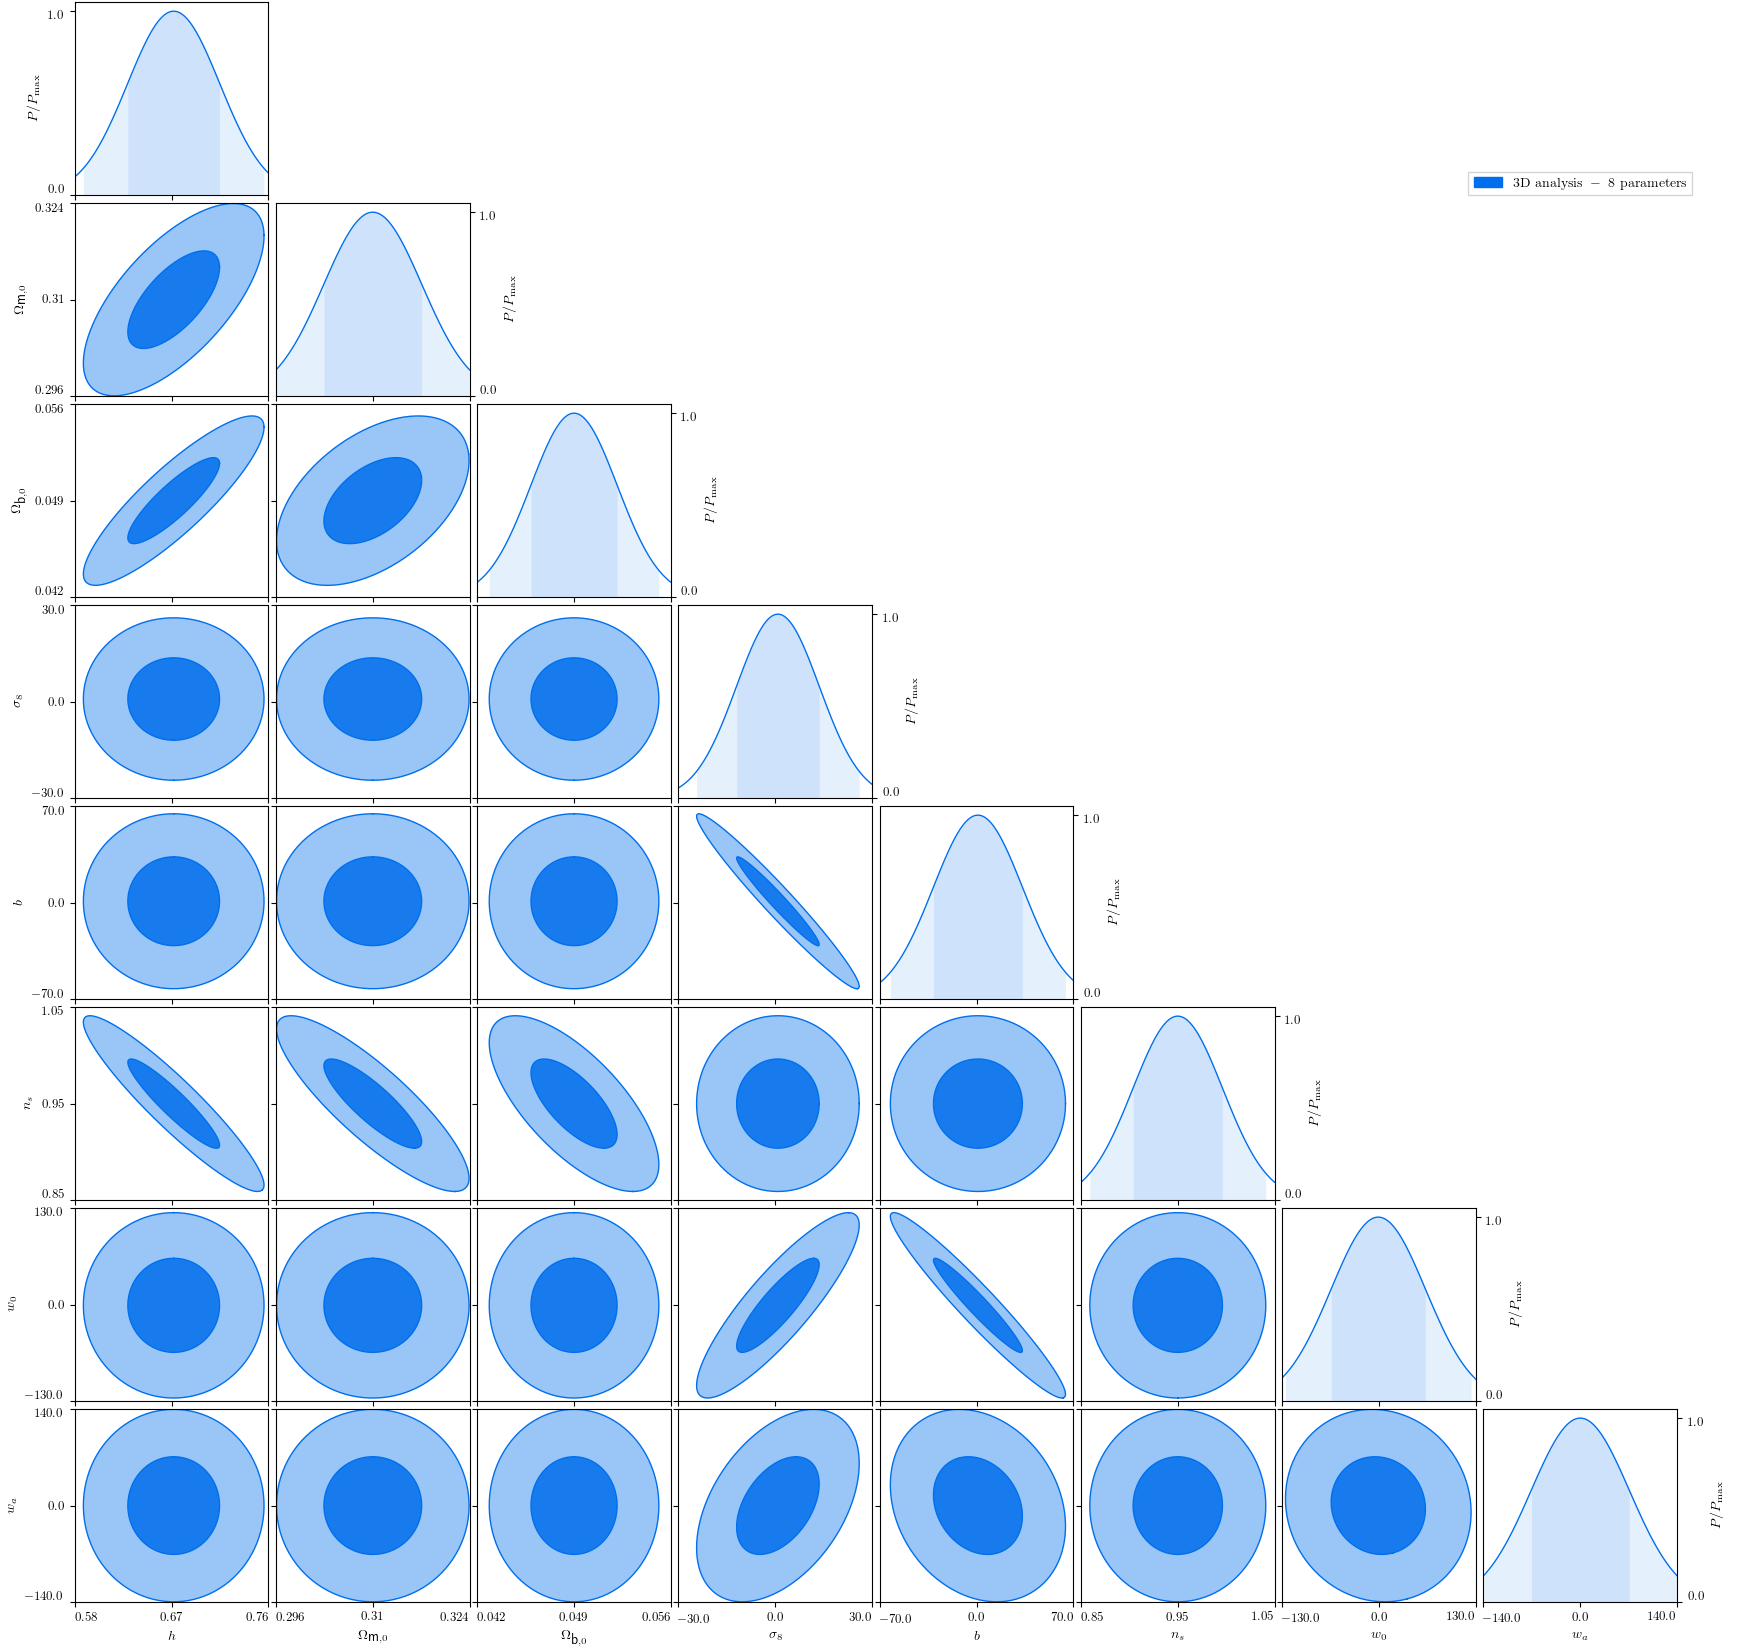

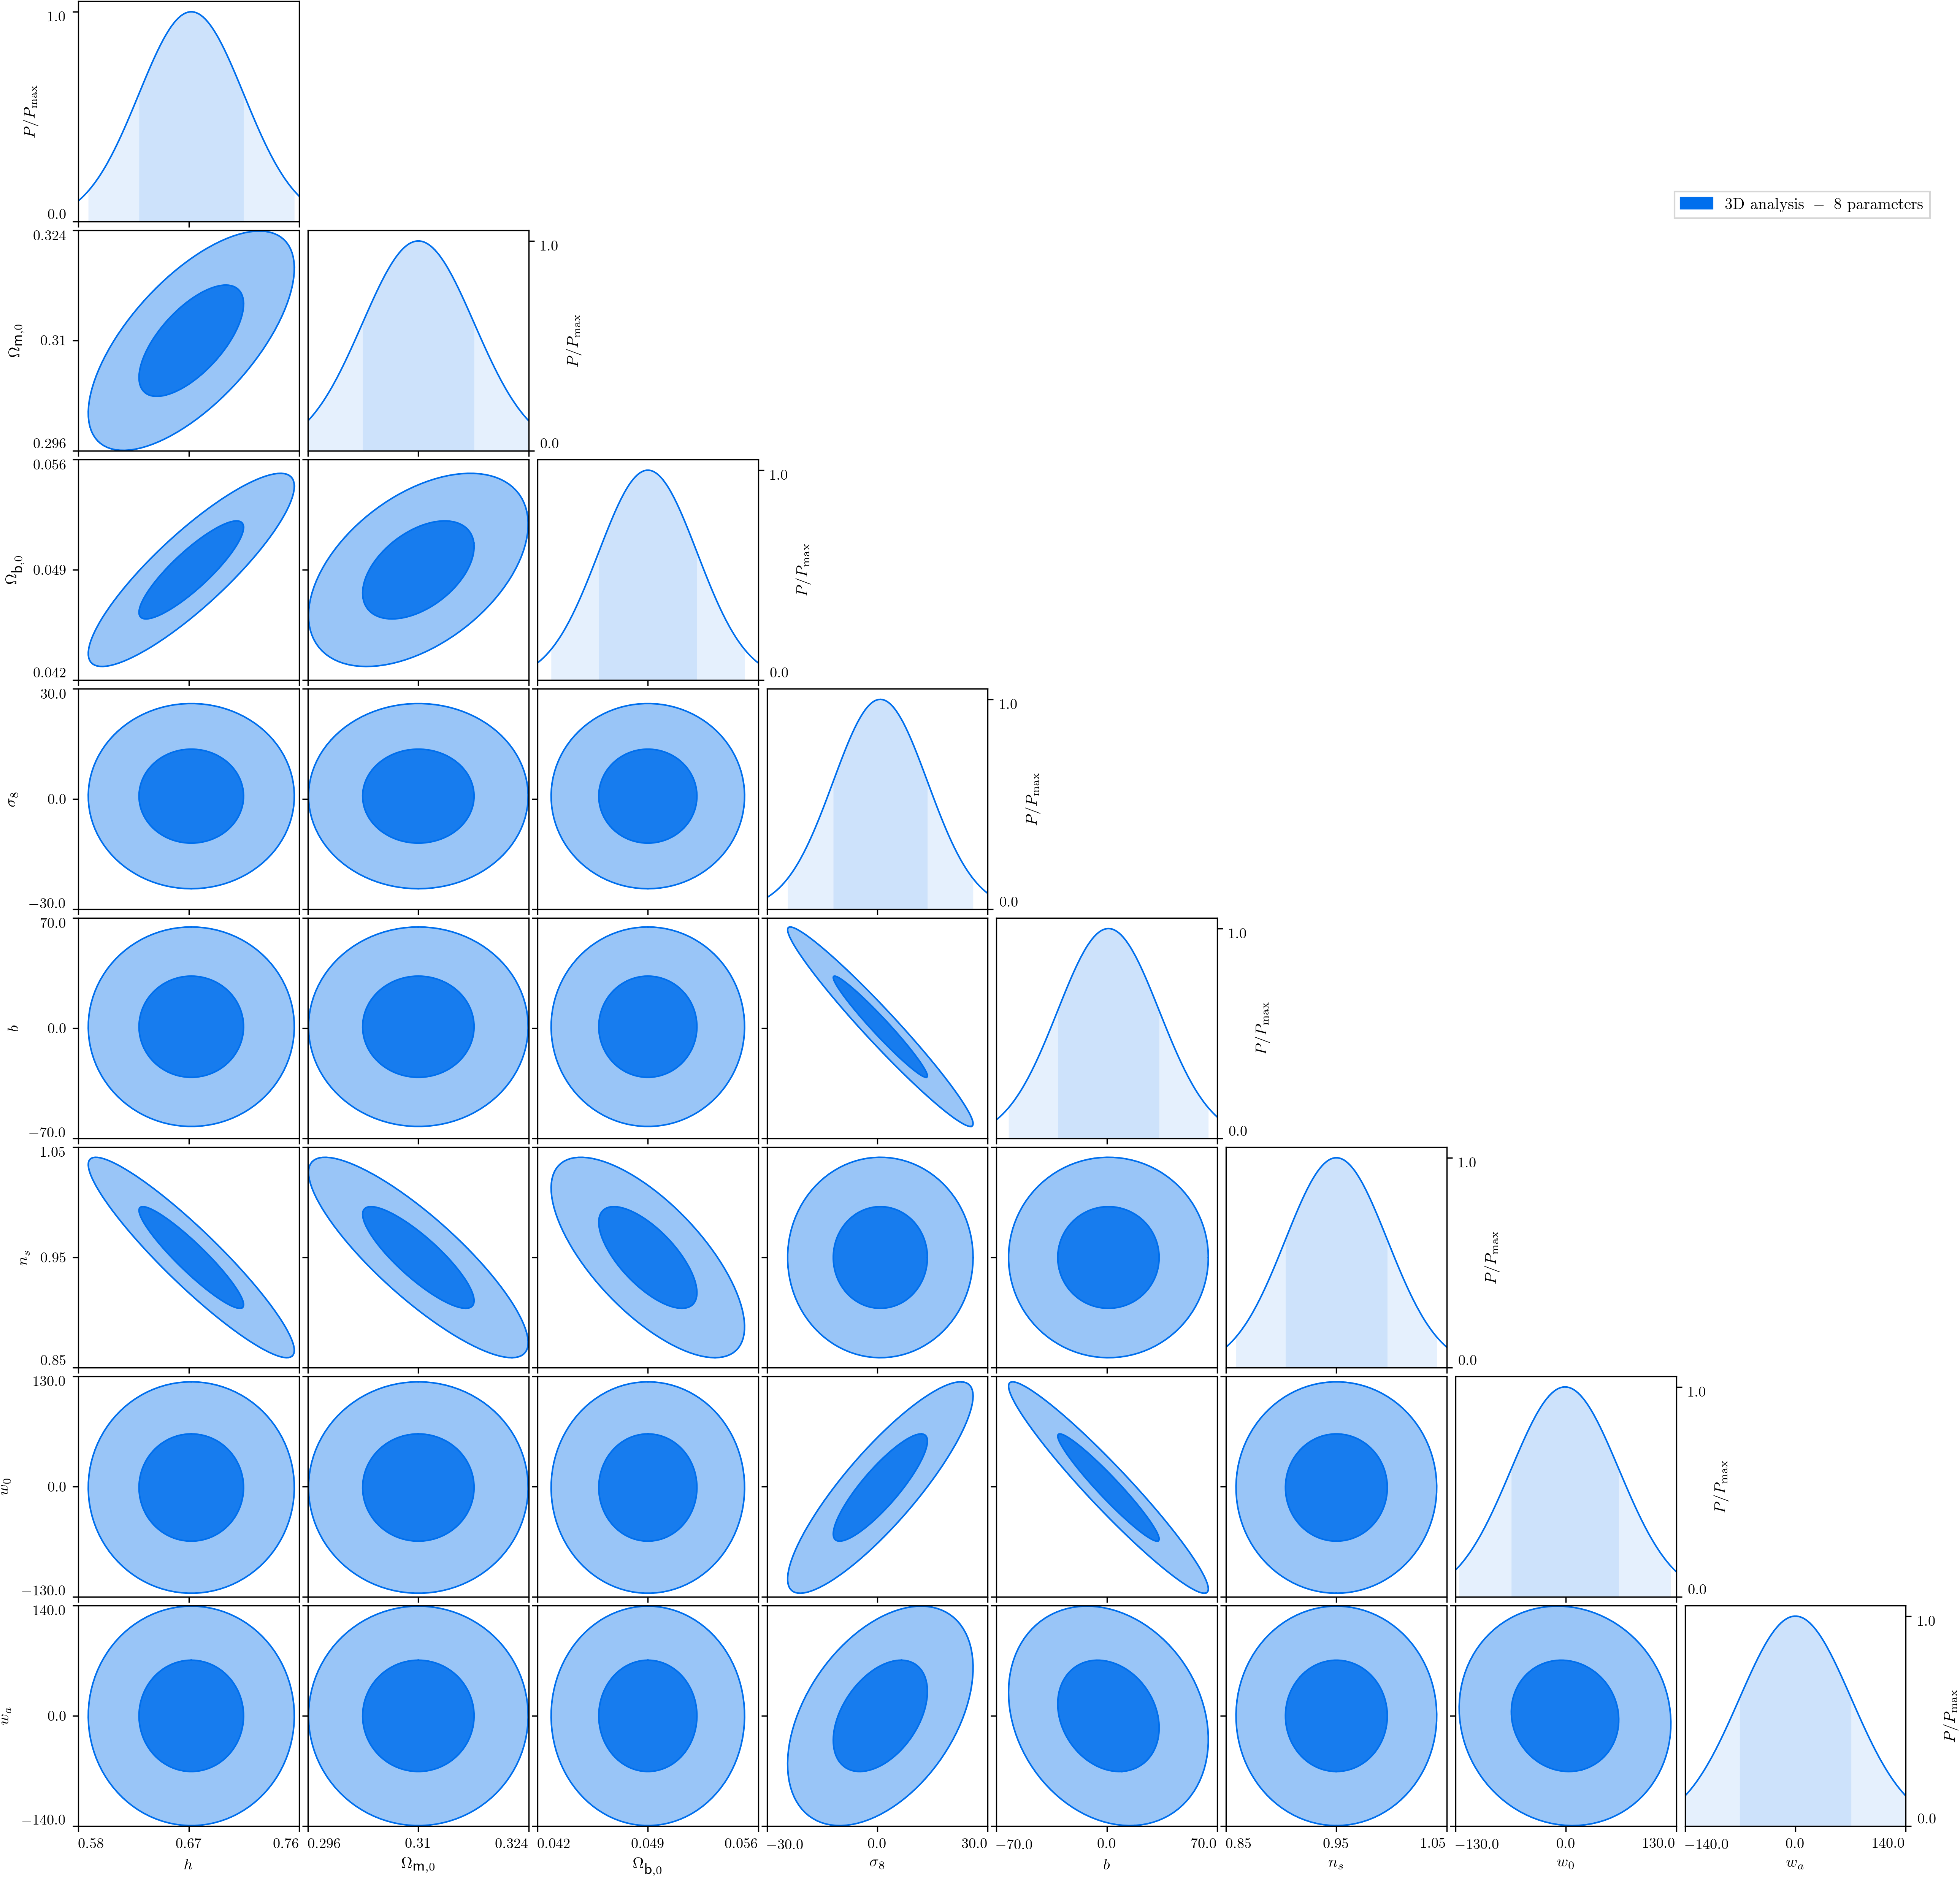

In [84]:
fisher_plotter.new_plot()
fisher_plotter.plot_tri()
fisher_plotter.export('corner_plot.png', dpi=100)
IPython.display.Image(filename='corner_plot.png',unconfined=True)

In [85]:
print(np.linalg.inv(Fisher_matr_1))

[[  1.83624790e-03   2.01028636e-04   1.16149535e-04   4.97122588e-04
   -1.12545369e-03  -1.84202597e-03   1.73257386e-03   3.23742567e-03]
 [  2.01028636e-04   5.04708465e-05   1.05152980e-05   9.88711714e-05
   -1.65252929e-04  -2.79946160e-04   1.39285600e-04   1.04269651e-03]
 [  1.16149535e-04   1.05152980e-05   9.79123517e-06   2.76247952e-05
   -6.86716309e-05  -1.00556804e-04   1.22659048e-04   1.22104605e-04]
 [  5.05071215e-04   1.00232782e-04   2.80777885e-05   9.09207063e+06
    1.04182973e+08  -6.36256305e-04  -4.89565071e+08   1.08149010e+09]
 [ -1.13509457e-03  -1.67173233e-04  -6.91801858e-05   1.03351593e+08
   -3.37224914e+08   1.26202457e-03   7.96941116e+08  -4.59891404e+08]
 [ -1.84202597e-03  -2.79946160e-04  -1.00556804e-04  -6.26786975e-04
    1.24965798e-03   2.15076239e-03  -1.55993295e-03  -5.33006639e-03]
 [  1.72447552e-03   1.39405974e-04   1.21934244e-04  -4.86088762e+08
    7.92009053e+08  -1.55546660e-03  -4.28019850e+08  -4.49283254e+09]
 [  3.3392241